<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/waypoint_guidance_with_pass_angle_constraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waypoint guidance with pass angle constraints


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

A discrete-time linear dynamical system consists of a sequence of state vectors $x_t \in \R^n$, indexed by time $t\in \{0,\dots,N-1\}$ and dynamics equations

$$
\begin{aligned}
  x_{t+1} &= Ax_t + Bu_t
\end{aligned}
$$

where $u_t\in\R^m$ is a control input to the dynamical system (say, a drive force or steering force on the vehicle). $A$ is the state transition matrix, $B$ is the input matrix.

Given $A$ and $B$, the goal is to find the optimal $u_0, \dots, u_{N-1}$ that drives the systems state to the desirable state at the final time, $x_N= x_\text{des}$, while minimizing the size of $u_0, \dots, u_N$.

<br>

A minimum energy controller finds $u_t$ by solving the following optimization problem

$$
\begin{aligned}
  \underset{u}{\minimize} \quad & \sum_{t=0}^{N-1} \|u_t\|^2  \\
  \text{subject to} \quad & x_N = x_{\text{des}} \\
  \quad & x_{t+1} = Ax_t + Bu_t, \qquad & t=0,\dots,N-1
\end{aligned}
$$

We'll apply a minimum energy control to a vehicle guidance problem with state $x_t\in\R^4$, where the first two states are the position of the vehicle in two dimensions, and the last two are the vehicle velocity, that is $x_t = ( p_x, p_y, v_x, v_y)_t$. The vehicle's control $u_t\in\R^2$ is acceleration control for the two axes.

Then the following matrices describe the above dynamics.

$$
A = \bmat{
1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t & 0 \\
0 & 1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t \\
0 & 0 & 1-\gamma\Delta t & 0 \\
0 & 0 & 0 & 1-\gamma\Delta t
} \\
B = \bmat{
0.5\Delta t^2 & 0 \\
0 & 0.5\Delta t^2 \\
\Delta t & 0 \\
0 & \Delta t
}
$$

<br>

We consider the finite horizon of $T=50$, with $\Delta t=0.05$, and $\gamma = 0.05$.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000 # number of timesteps
T = 50 # time will vary from 0 to T with step delt
ts = np.linspace(0,T,n+1)
delt = T/n
gamma = .05 # damping, 0 is no damping

A = np.zeros((4,4))
B = np.zeros((4,2))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt


<br>

Instead of the terminal constraints, $x_N = x_\text{des}$, we will impose _constraints on positions and pass angles_ at several intermediate times, $t_1 < t_2 < \cdots < t_K = N$. More specifically, we will let $w_1, w_2, \dots, w_K\in\R^2$ be the $K$ _waypoints_, by which the vehicle needs to pass at $t_1,  t_2, \dots t_K$, and let $\alpha_1, \alpha_2, \dots, \alpha_K\in\R$ be the $K$ _pass angles_, with which the vehicle's velocity vectors need to be aligned at $t_1,  t_2, \dots t_K$. In other words, for every $k=1,2,\dots,K$, we have the following constraints.

$$
\begin{aligned}
  p_{t_k} &= w_k  \\
  \angle v_{t_k} &= \alpha_k
\end{aligned}
$$

<br>

So the waypoint guidance problem with pass angle constraints can be formulated as follows.

$$
\begin{aligned}
  \underset{u}{\minimize} \quad & \sum_{t=0}^{N-1} \|u_t\|^2  \\
  \text{subject to} \quad & x_{t+1} = Ax_t + Bu_t, \qquad & t=0,\dots,N-1\\
  \quad & p_{t_k} = w_k, \qquad & k=1,\dots, K \\
  \quad & \angle v_{t_k} = \alpha_k. \qquad & k=1,\dots, K
\end{aligned}
$$


<br>

Now, the problem is here. The vehicle is initially at $(10,-20)$ with initial velocity of $(30,-10)$, and we impose the waypoint and the pass angle constraint at $(t_1, t_2, t_3) = (300, 600, 1000)$ as follows.

$$
\begin{aligned}
w_{300} &= (100,0) \\
w_{600} &= (50,50) \\
w_{1000} &= (150,80) \\
\alpha_{300} &= 135 \deg \\
\alpha_{600} &= 60 \deg \\
\alpha_{1000} &= 0 \deg \\
\end{aligned}
$$


array([299, 599, 999])

(4, 1001)


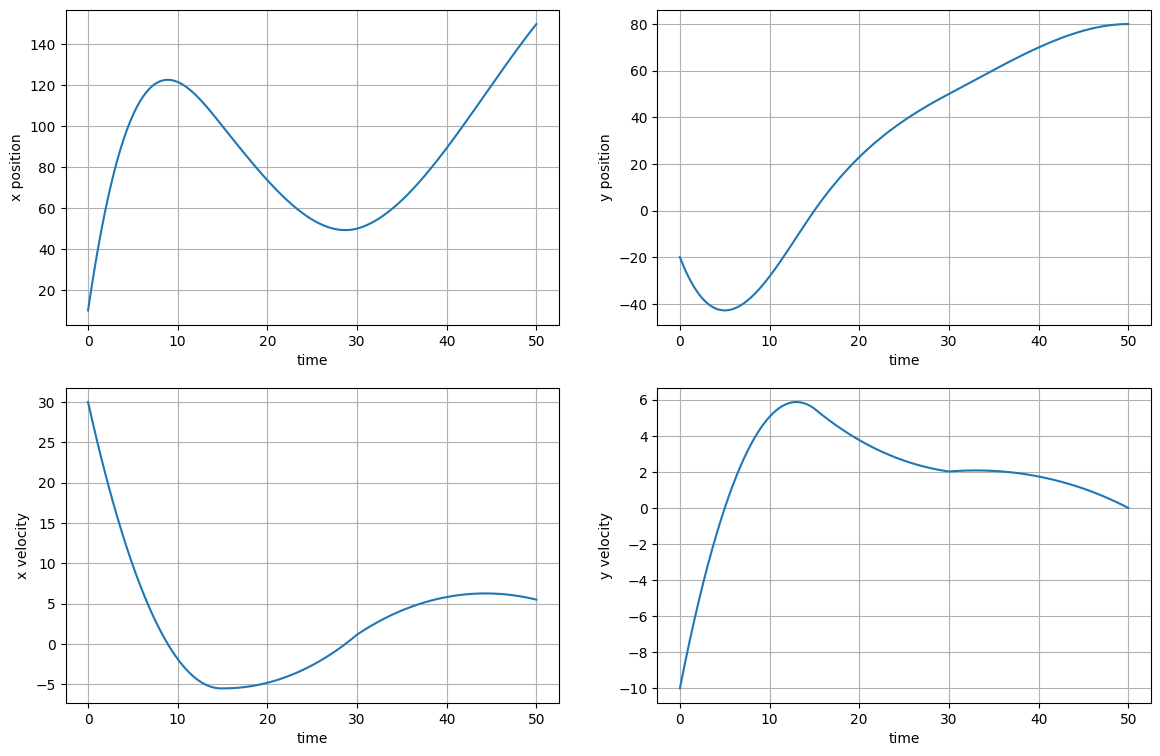

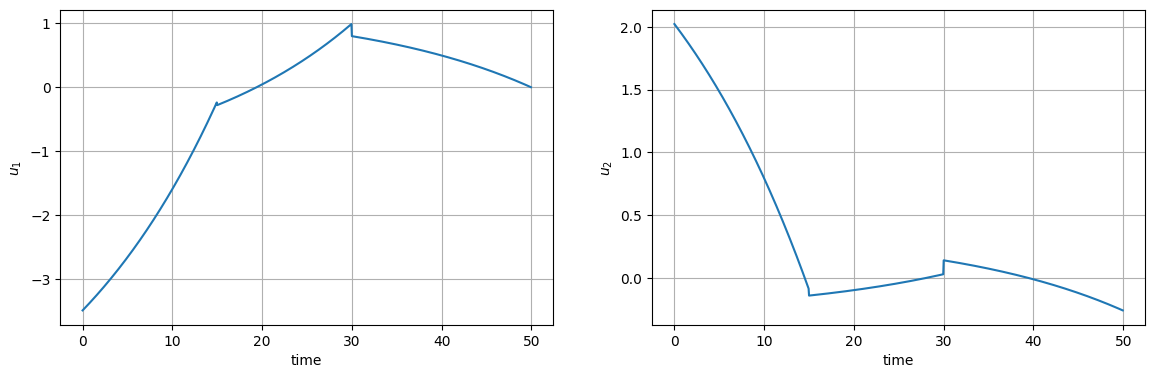

In [44]:
x_0 = np.array([10, -20, 30, -10])

K = 3
tk = np.array([ 300, 600, 1000])-1
display(tk)
wp = np.array([[100,  50,  150],
               [  0,  50,   80],
               [  0,   0,    0]])
pa = np.array([ 135,  60,    0])

x_des_const = np.array([100,0,0,50,50,0,150,80,0])
C1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,np.tan(np.deg2rad(135)),-1]])
C2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,np.tan(np.deg2rad(60)),-1]])
C3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,np.tan(np.deg2rad(0)),-1]])
C = [C1,C2,C3]

G1 = np.zeros([9,4])

for i in range(3):
  G1[3*i:3*(i+1),:] = C[i]@np.linalg.matrix_power(A,tk[i]+1)

G2 = np.zeros([9,2*1000])
for i in range(1000):
  #first C1 update
  if 299-i >= 0:
    G2[0:3,2*i:2*(i+1)] = C1@np.linalg.matrix_power(A,299-i)@B

  #second C1 update
  if 599-i >= 0:
    G2[3:6,2*i:2*(i+1)] = C2@np.linalg.matrix_power(A,599-i)@B

  if 999-i >= 0:
    G2[6:9,2*i:2*(i+1)] = C3@np.linalg.matrix_power(A,999-i)@B




u = np.linalg.lstsq(G2,x_des_const - G1@x_0,rcond= 0)[0]

u_opt = u.reshape(1000,2).T

N = len(u_opt.T)
x = np.zeros((4,N+1))
x[:,0] = x_0

for t in range(N):
    x[:,t+1] = A.dot(x[:,t]) + B.dot(u_opt[:,t])
print(np.shape(x))

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts,x[0,:])
plt.xlabel('time')
plt.ylabel('x position')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts,x[1,:])
plt.xlabel('time')
plt.ylabel('y position')
plt.grid()
plt.subplot(2,2,3)
plt.plot(ts,x[2,:])
plt.xlabel('time')
plt.ylabel('x velocity')
plt.grid()
plt.subplot(2,2,4)
plt.plot(ts,x[3,:])
plt.xlabel('time')
plt.ylabel('y velocity')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],u_opt[0,:])
plt.xlabel('time')
plt.ylabel(r'$u_1$')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts[:-1],u_opt[1,:])
plt.xlabel('time')
plt.ylabel(r'$u_2$')
plt.grid()
plt.show()

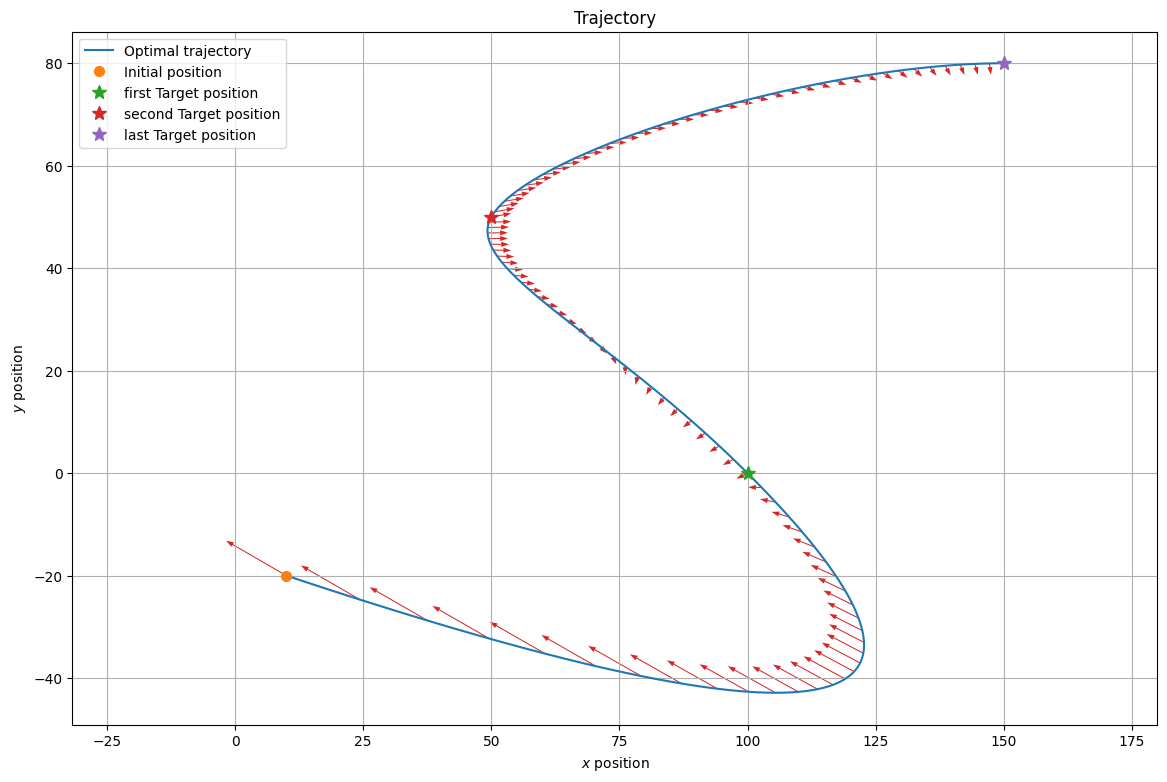

In [41]:
plt.figure(figsize=(14,9), dpi=100)
plt.plot(x[0,:],x[1,:], label='Optimal trajectory')
plt.plot(x_0[0], x_0[1], 'o', markersize=7, label='Initial position')
plt.plot(x_des_const[0], x_des_const[1], '*', markersize=10, label='first Target position')
plt.plot(x_des_const[3], x_des_const[4], '*', markersize=10, label='second Target position')
plt.plot(x_des_const[6], x_des_const[7], '*', markersize=10, label='last Target position')
plt.title('Trajectory')
plt.legend()
for i in range(0,N-1,10):
  plt.arrow(x[0,i], x[1,i], 3*u_opt[0,i], 3*u_opt[1,i], head_width=1, width=0.2, fc='tab:red', ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()

<br>

Find the optimal control and the optimal trajectory. Your solution should look like below.

# VS O1.preview

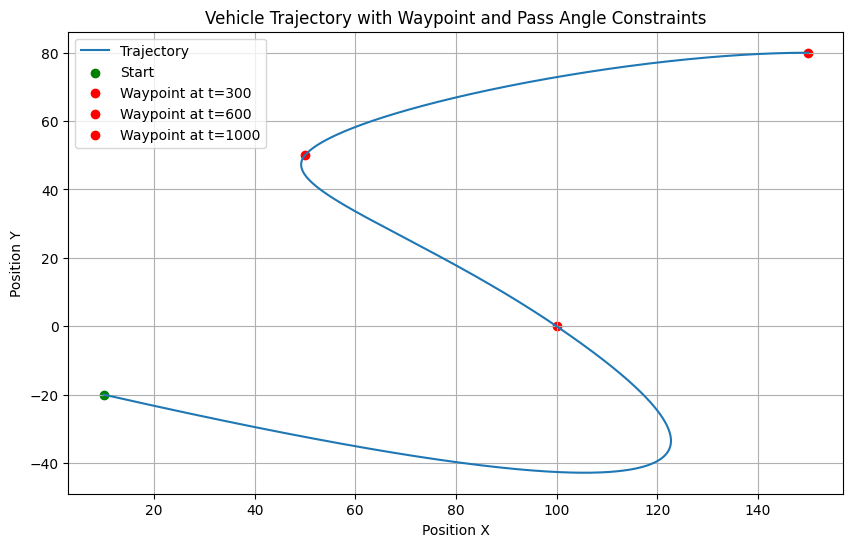

In [42]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of timesteps
T = 50
delt = T / N
gamma = 0.05
ts = np.linspace(0, T, N+1)

# System matrices
A = np.zeros((4, 4))
B = np.zeros((4, 2))

A[0, 0] = 1
A[1, 1] = 1
A[0, 2] = (1 - gamma*delt/2)*delt
A[1, 3] = (1 - gamma*delt/2)*delt
A[2, 2] = 1 - gamma*delt
A[3, 3] = 1 - gamma*delt

B[0, 0] = delt**2 / 2
B[1, 1] = delt**2 / 2
B[2, 0] = delt
B[3, 1] = delt

# Initial state
x0 = np.array([10, -20, 30, -10])

# Waypoints and pass angles
waypoints = {300: np.array([100, 0]),
             600: np.array([50, 50]),
             1000: np.array([150, 80])}
angles_deg = {300: 135, 600: 60, 1000: 0}
angles_rad = {k: np.deg2rad(v) for k, v in angles_deg.items()}
x = cp.Variable((4, N+1))
u = cp.Variable((2, N))

# Constraints
constraints = [x[:, 0] == x0]

# System dynamics constraints
for t in range(N):
    constraints.append(x[:, t+1] == A @ x[:, t] + B @ u[:, t])

# Waypoint and pass angle constraints
for t_k, w_k in waypoints.items():
    # Position constraints
    constraints.append(x[0, t_k] == w_k[0])
    constraints.append(x[1, t_k] == w_k[1])

    # Pass angle constraints
    alpha = angles_rad[t_k]
    sin_alpha = np.sin(alpha)
    cos_alpha = np.cos(alpha)
    constraints.append(-sin_alpha * x[2, t_k] + cos_alpha * x[3, t_k] == 0)

# Objective function: minimize the sum of squares of control inputs
objective = cp.Minimize(cp.sum_squares(u))

# Define and solve the problem
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.OSQP)  # You can choose other solvers if preferred

# Extract the optimal values
x_opt = x.value
u_opt = u.value

# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_opt[0, :], x_opt[1, :], label='Trajectory')
plt.scatter([x0[0]], [x0[1]], color='green', label='Start')
for t_k, w_k in waypoints.items():
    plt.scatter([w_k[0]], [w_k[1]], color='red', label=f'Waypoint at t={t_k}')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Vehicle Trajectory with Waypoint and Pass Angle Constraints')
plt.legend()
plt.grid(True)
plt.show()


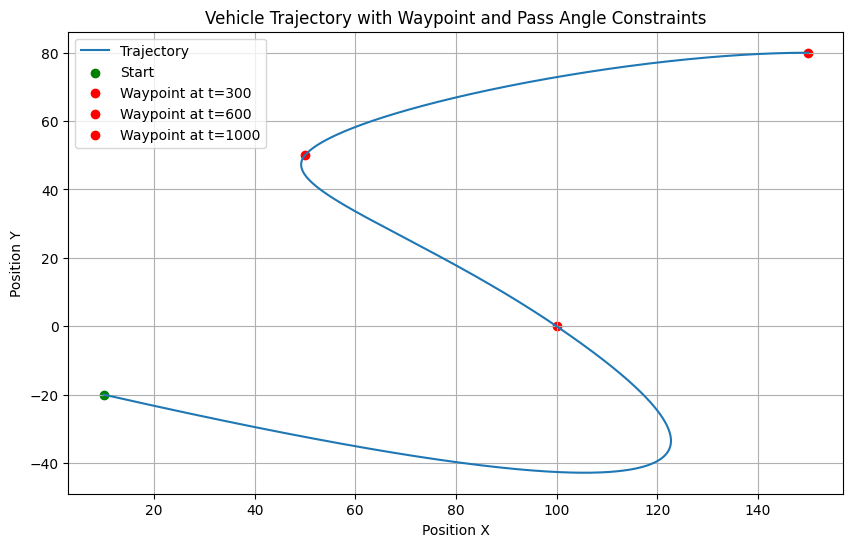

At time 300: Computed angle = 135.00°, Desired angle = 135°
At time 600: Computed angle = 60.00°, Desired angle = 60°
At time 1000: Computed angle = 0.00°, Desired angle = 0°


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
N = 1000  # Number of timesteps
T = 50
delt = T / N
gamma = 0.05

# System matrices
A = np.zeros((4, 4))
B = np.zeros((4, 2))

A[0, 0] = 1
A[1, 1] = 1
A[0, 2] = (1 - gamma * delt / 2) * delt
A[1, 3] = (1 - gamma * delt / 2) * delt
A[2, 2] = 1 - gamma * delt
A[3, 3] = 1 - gamma * delt

B[0, 0] = delt ** 2 / 2
B[1, 1] = delt ** 2 / 2
B[2, 0] = delt
B[3, 1] = delt

# Initial state
x0 = np.array([10, -20, 30, -10])

# Waypoints and times
waypoints = {
    300: np.array([100, 0]),
    600: np.array([50, 50]),
    1000: np.array([150, 80])
}

# Pass angles in degrees
angles_deg = {
    300: 135,
    600: 60,
    1000: 0
}

# Convert angles to radians
angles_rad = {k: np.deg2rad(v) for k, v in angles_deg.items()}

# Maximum time for precomputing
t_max = N

# Precompute A powers
A_powers = [np.eye(4)]
for i in range(1, t_max + 1):
    A_powers.append(A_powers[-1] @ A)

# Precompute A^i B
A_powers_B = []
for i in range(t_max):
    A_powers_B.append(A_powers[i] @ B)

# Function to compute G_tk
def compute_G_tk(t_k, A_powers_B, N):
    G_tk = np.zeros((4, 2 * N))
    for i in range(t_k):
        idx = 2 * i
        A_power_B = A_powers_B[t_k - 1 - i]
        G_tk[:, idx:idx + 2] = A_power_B
    return G_tk

# Initialize lists to hold constraints
C_rows = []
d_values = []

for t_k, w_k in waypoints.items():
    # Compute G_tk and x_tk0
    G_tk = compute_G_tk(t_k, A_powers_B, N)
    x_tk0 = A_powers[t_k] @ x0

    # Position constraints
    for idx in range(2):
        e = np.zeros(4)
        e[idx] = 1
        C_row = e @ G_tk
        d_value = w_k[idx] - e @ x_tk0
        C_rows.append(C_row)
        d_values.append(d_value)

    # Pass angle constraint
    alpha = angles_rad[t_k]
    c_k = np.array([0, 0, -np.sin(alpha), np.cos(alpha)])
    C_row = c_k @ G_tk
    d_value = -c_k @ x_tk0
    C_rows.append(C_row)
    d_values.append(d_value)

# Assemble the constraint matrix and vector
C = np.vstack(C_rows)  # Shape: (number of constraints, 2N)
d = np.array(d_values)  # Shape: (number of constraints,)

# Solve the least squares problem
CCt_inv = np.linalg.inv(C @ C.T)
u = C.T @ CCt_inv @ d  # Control inputs

# Initialize state trajectory
x = np.zeros((4, N + 1))
x[:, 0] = x0

# Apply control inputs to simulate the system
for t in range(N):
    u_t = u[2 * t:2 * (t + 1)]
    x[:, t + 1] = A @ x[:, t] + B @ u_t

# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x[0, :], x[1, :], label='Trajectory')
plt.scatter([x0[0]], [x0[1]], color='green', label='Start')
for t_k, w_k in waypoints.items():
    plt.scatter([w_k[0]], [w_k[1]], color='red', label=f'Waypoint at t={t_k}')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Vehicle Trajectory with Waypoint and Pass Angle Constraints')
plt.legend()
plt.grid(True)
plt.show()

# Verify pass angle constraints
def compute_angle(vx, vy):
    return np.rad2deg(np.arctan2(vy, vx)) % 360

for t_k in waypoints.keys():
    vx = x[2, t_k]
    vy = x[3, t_k]
    angle = compute_angle(vx, vy)
    desired_angle = angles_deg[t_k] % 360
    print(f"At time {t_k}: Computed angle = {angle:.2f}°, Desired angle = {desired_angle}°")
